In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
from test_data.import_data import get_data

[acc, gyro, mag] = get_data()

In [15]:
from ahrs import filters
from ahrs.common.orientation import acc2q

ekf = filters.EKF(frequency=1000, frame='ENU')

In [16]:
estimated_states = np.empty((len(acc), 4))
estimated_states[0] = acc2q(acc[0])
for i in range(1, len(estimated_states)):
    estimated_states[i] = ekf.update(estimated_states[i - 1], gyr=gyro[i], acc=acc[i], mag=mag[i])

In [20]:
from utils import quaternion_to_euler
phi_hat, theta_hat, psi_hat = quaternion_to_euler(estimated_states)

def clamp_to_360(x):
    x = np.mod(x, 360)
    return x

phi_hat = clamp_to_360(phi_hat)
theta_hat = clamp_to_360(theta_hat)
psi_hat = clamp_to_360(psi_hat - 90) 

In [21]:
from test_data.import_data import get_gt

phi, theta, psi = quaternion_to_euler(get_gt())

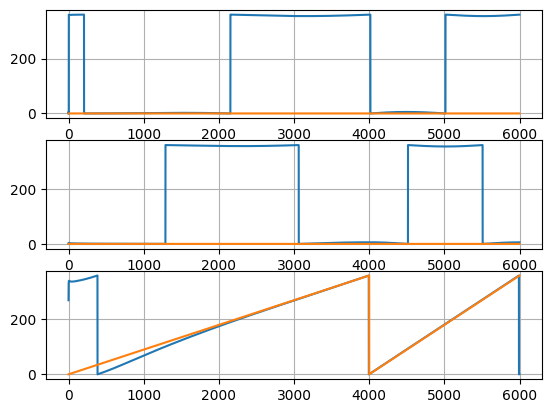

In [22]:
%matplotlib inline

plt.subplot(3, 1, 1)
plt.plot(phi_hat)
plt.plot(phi)
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(theta_hat)
plt.plot(theta)
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(psi_hat)
plt.plot(psi)
plt.grid()

plt.show()